In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [ ]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

# ETL Process

Basic Checks

In [ ]:
print(df.head())
print(df.tail())
print(df.describe())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

# Data Cleaning

In [ ]:
print(df['opposition'])

# Opposition name says ' v Aus' etc , we can remove 'v '
# df['opposition'] = df['opposition'].apply(lambda x: x[2:]) (Alternative way)
df['opposition'] = df['opposition'].str.replace('v ','', regex = False)

# regex = False means that the first string('v ') is not a regex, but a literal string
print(df['opposition'])


0       v Bangladesh
1       v Bangladesh
2       v Bangladesh
3         v Pakistan
4         v Pakistan
           ...      
345    v West Indies
346        v England
347     v Bangladesh
348      v Sri Lanka
349    v New Zealand
Name: opposition, Length: 350, dtype: object
0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object


In [ ]:
# Add a feature - 'year' column using the match date column

# First convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df['year'] = df['date'].dt.year.astype(int)
print(df['year'])

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int64


In [ ]:
# Create a column to distinguisg between out and not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith("*"), 1, 0)
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  odi_number  year  not_out  
0     Chattogram 2004-12-23  ODI # 2199  2004        0  
1          Dhaka 2004-12-26  ODI # 2201  2004        0  
2          Dhaka 2004-12-27  ODI # 2202  2004        1  
3          Kochi 2005-04-02  ODI # 2235  2005        0  
4  Visakhapatnam 2005-04-05  ODI # 2236  2005        0  


Reason we did not drop score column : because it has DIDNOTBAT & TEAMDIDNOTBAT values so when calculating run average it will be considered as 0 which hinders the average, hence we create a new dataframe which will locate the cases of DNB & TDNB

In [ ]:
# Dropping the odi_number feature because it adds no value to the analysis
# print(df.drop(columns = 'odi_number'))  # Temporary change

# print(df.drop(columns = 'odi_number', inplace = True))  # inplace = True makes the changes permanent

df = df.drop(columns = 'odi_number') # Same, but better syntax


In [ ]:
#dropping those innings where Dhoni did not bat and storing in a new dataframe
# Take all the columns, starting with runs scored
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
print(df_new)

    runs_scored balls_faced strike_rate fours sixes   opposition  \
0             0           1           0     0     0   Bangladesh   
1            12          11      109.09     2     0   Bangladesh   
2             7           2         350     0     1   Bangladesh   
3             3           7       42.85     0     0     Pakistan   
4           148         123      120.32    15     4     Pakistan   
..          ...         ...         ...   ...   ...          ...   
344          28          52       53.84     3     0  Afghanistan   
345          56          61        91.8     3     2  West Indies   
346          42          31      135.48     4     1      England   
347          35          33      106.06     4     0   Bangladesh   
349          50          72       69.44     1     1  New Zealand   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhaka 2004-12-26  2004        0  
2            Dhaka 2004-12-27  2004       

Fixing the data types of numerical columns

In [ ]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)


# Career Stats

In [ ]:
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # First match
print(first_match_date)

December 23, 2004


In [ ]:
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print(last_match_date)

July 09, 2019


In [ ]:
number_of_matches = df.shape[0] # 0 Rows 1 Columns
print('Number of matches played: ', number_of_matches)

Number of matches played:  350


In [ ]:
number_of_inn = df_new.shape[0]
print('Number of innings played: ', number_of_inn)

Number of innings played:  297


In [ ]:
not_outs = df['not_out'].sum()
print('Number of not outs: ', not_outs)

Number of not outs:  84


In [ ]:
runs_scored = df_new['runs_scored'].sum()
print('Total runs scored: ', runs_scored)

Total runs scored:  10773


In [ ]:
balls_faced = df_new['balls_faced'].sum()
print('Total balls faced: ', balls_faced)

Total balls faced:  12303


In [ ]:
carrer_sr = (runs_scored/balls_faced)*100
print('Career strike rate: ', carrer_sr)


Career strike rate:  87.56400877834675


In [ ]:
carrer_avg = runs_scored/(number_of_inn-not_outs)
print('Career average: ', carrer_avg)

Career average:  50.57746478873239


In [ ]:
hundreds = (df_new['runs_scored']>=100).sum()
print('Number of hundreds: ', hundreds)

Number of hundreds:  10


In [ ]:
fifties = ((df_new['runs_scored']>=50) & (df_new['runs_scored']<100)).sum()
print('Number of fifties: ', fifties)

Number of fifties:  73


In [ ]:
fours = df_new['fours'].sum()
print('Number of fours: ', fours)

Number of fours:  826


In [ ]:
sixes = df_new['sixes'].sum()
print('Number of sixes: ', sixes)

Number of sixes:  229


# Number of matches played against different oppositions

Count the occurrences of each unique value in the 'opposition' column

In [ ]:
# opposition_count will be a series with a labled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


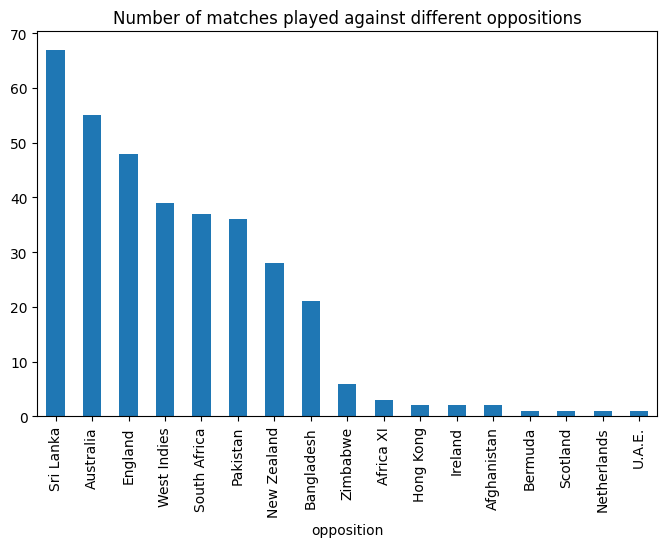

In [ ]:
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches played against different oppositions', figsize=(8, 5))
plt.show()


# Runs scored against each team

In [ ]:
# Group the DataFrame by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')

In [ ]:
# Sum the 'runs_scored' column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int64


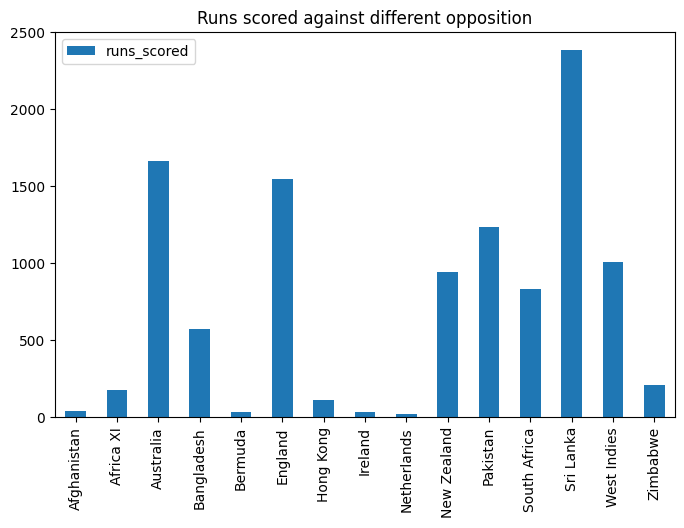

In [ ]:
# sum_of_runs_scored is a series with labled index as opposition
# Convert it into dataFrame and removed the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(kind='bar', x='opposition', title='Runs scored against different opposition', figsize=(8, 5))
plt.xlabel(None)
plt.show()

# Does not look good let us sort it

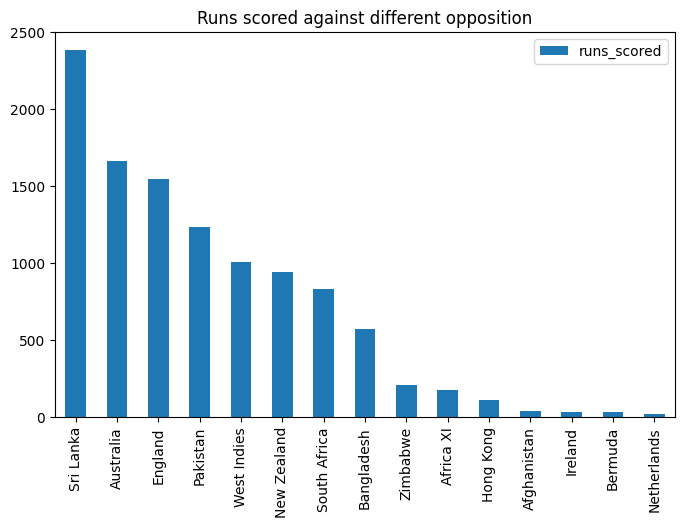

In [ ]:
sorted = runs_scored_by_opposition.sort_values(by='runs_scored', ascending=False)
sorted.plot(kind='bar', x='opposition', title='Runs scored against different opposition', figsize=(8, 5))
plt.xlabel(None)
plt.show()

# Boxplot of runs against various oppositions

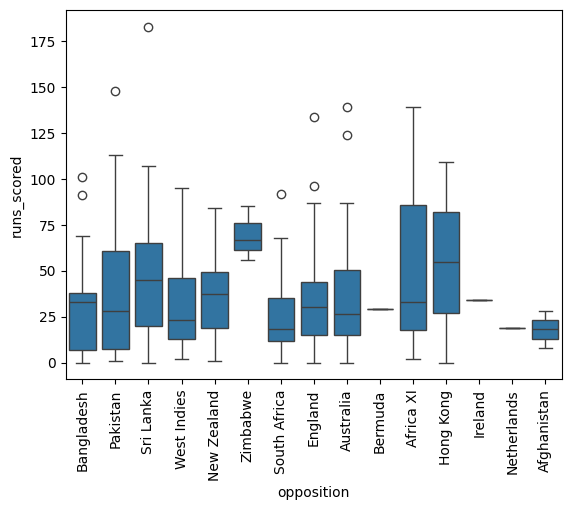

In [ ]:
sns.boxplot(x='opposition', y='runs_scored', data=df_new)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Looks crowded - let us retain only major countries
# list of oppositon to filter
opposition_list = ['England','Australia','India','South Africa','New Zealand','Sri Lanka','Pakistan','Bangladesh','West Indies']

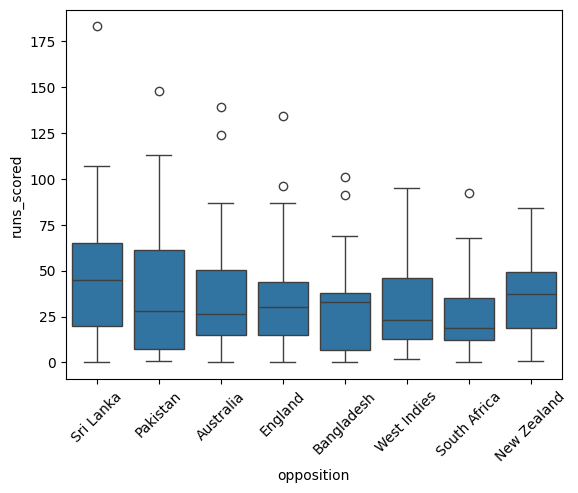

In [ ]:
# Filter rows where opposition is in the list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by='runs_scored', ascending=False)
sns.boxplot(x='opposition', y='runs_scored', data=df_filtered)
plt.xticks(rotation=45)
plt.show()

Histogram (distplot) with and without kde (Kernel Density Estimation)

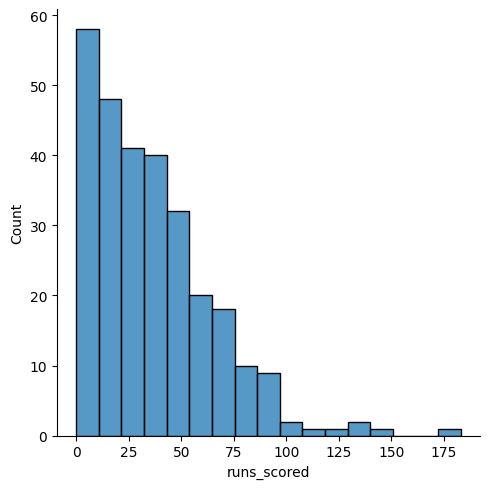

In [ ]:
sns.displot(data=df_filtered, x='runs_scored', kde=False)
plt.show()
# we see that there is right/positive skew, so there is a long tail to the right

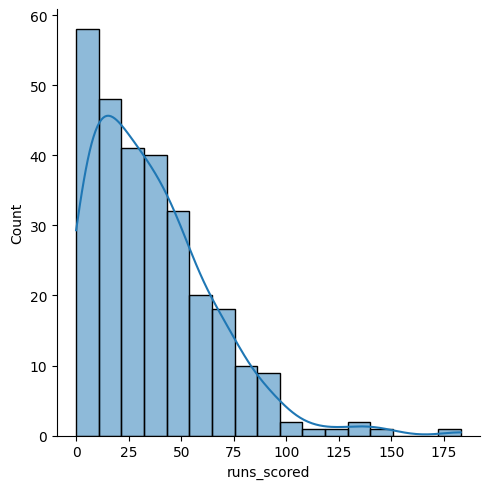

In [ ]:
sns.displot(data=df_filtered, x='runs_scored', kde=True)
plt.show()

# histogram with bins

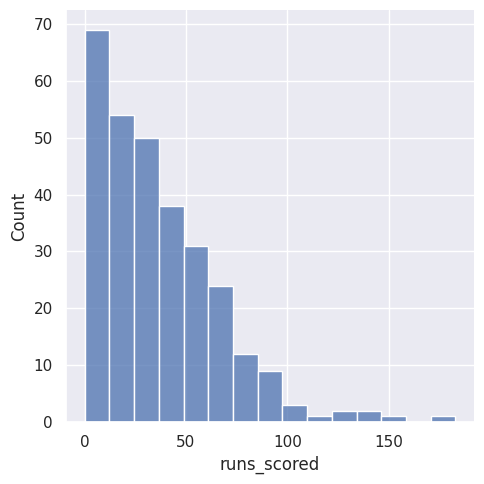

In [ ]:
sns.set(style='darkgrid')
sns.displot(data=df_new, x='runs_scored', bins=15)
plt.show()


# KDE plot

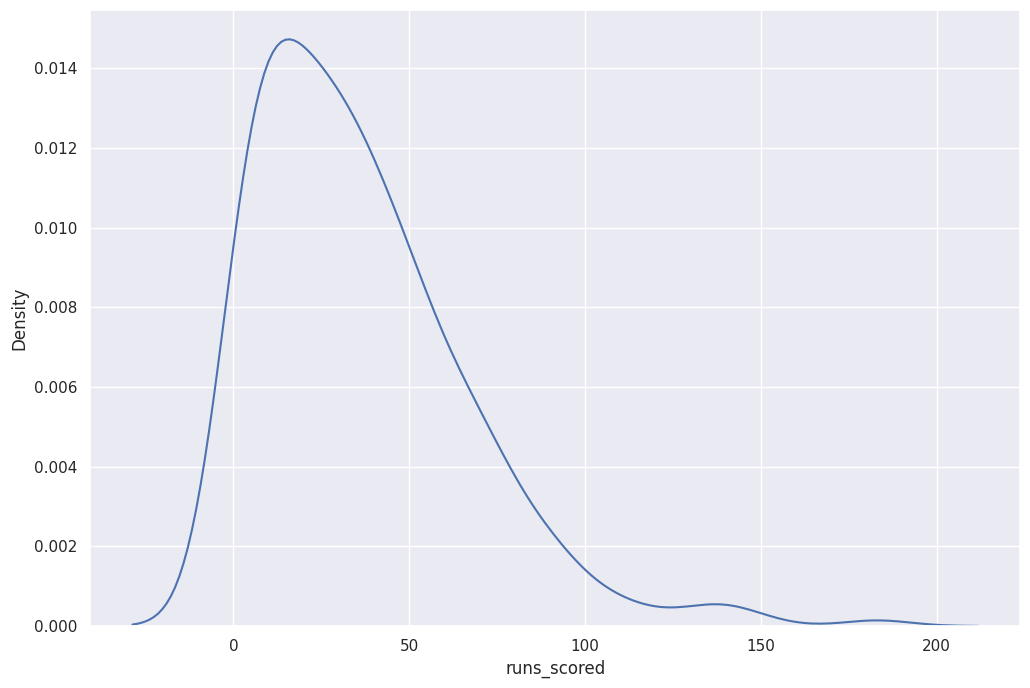

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_new, x='runs_scored')
plt.show()

# KDE plot with cumulative probability

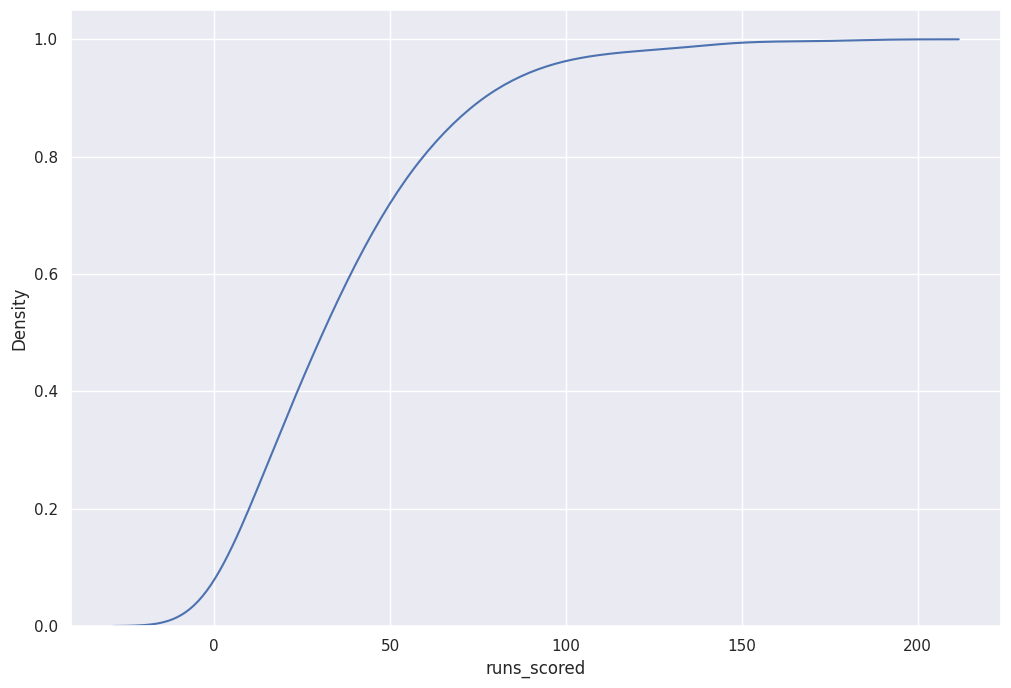

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_new, x='runs_scored', cumulative=True)
plt.show()

# Jointplot

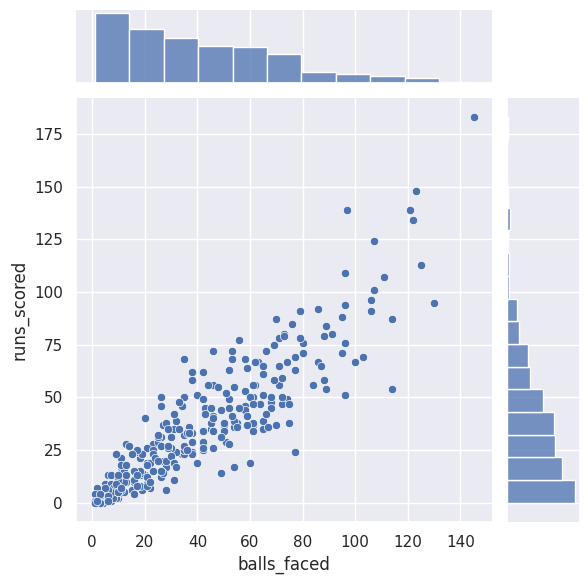

In [ ]:
sns.jointplot(x='balls_faced', y='runs_scored', data=df_new, kind='scatter')
plt.show()

# Heat map

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

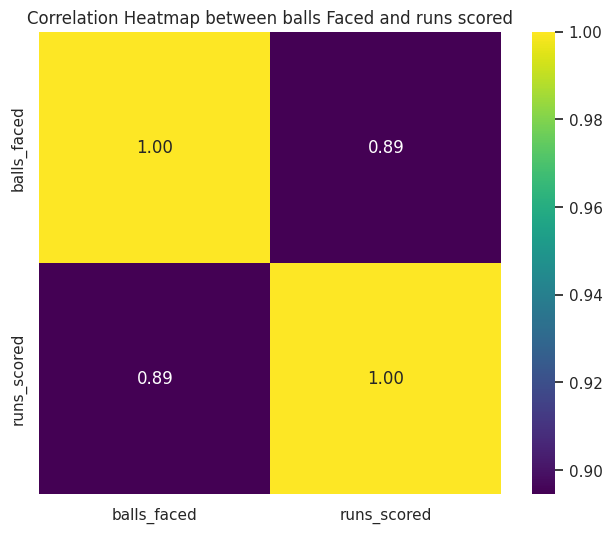

In [ ]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', square=True, fmt='.2f')
plt.title('Correlation Heatmap between balls Faced and runs scored')
plt.show()

In [ ]:
# Calculate strike-rate per opposition and show as a heat map
grouped_by_opposition = df_filtered.groupby('opposition')
agg_sum = grouped_by_opposition.agg({'balls_faced': 'sum', 'runs_scored': 'sum'})
df_strike_rate = agg_sum

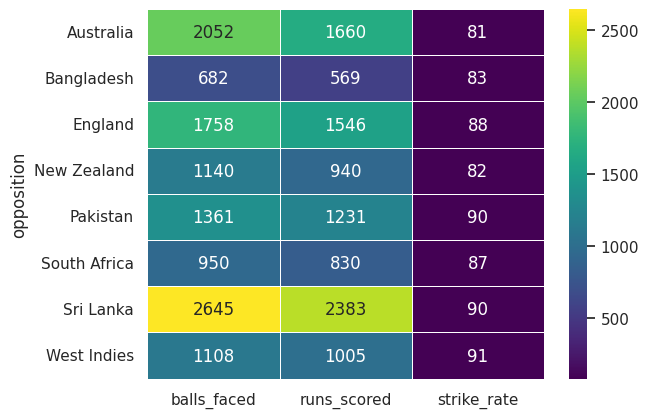

In [ ]:
# Calculate strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored'] / df_strike_rate['balls_faced']) * 100
sns.heatmap(df_strike_rate, linewidths=0.5, annot=True, fmt='.0f', cmap='viridis')
plt.show()